# Model Evaluation (Iris Dataset)

In this notebook, we will:
- Train the best-performing model fully on the training set
- Evaluate performance on the test set
- Compare metrics and visualize results

### Step 1: Set Project Root for Python Imports

In [1]:
import os
import sys

# Add project root to sys.path
sys.path.append(os.path.abspath(".."))

### Step 2: Load Titanic dataset and display the shape of X

In [2]:
from src.data import load_data
df =load_data(r"D:\Thiru\ML_Projects\Iris-Species-Prediction\Data\processed\cleaned_iris.csv")

from src.model import train_test
X_train, X_test, Y_train, Y_test = train_test(df)

Training Sample: (120, 4)
Testing Sample: (30, 4)


### Step 3: Train the final model
we select **SVC** as our best model.

In [3]:
from src.model import train_model
y_pred, y_score, model = train_model(X_train, Y_train, X_test)

**Explanation:**

- SVC is selected based on Algorithm-Comparison notebook results.  
- Trained on the entire training set.  
- y_pred = predicted classes, y_score = confidence scores from the decision function used for ROC/AUC analysis.  
- The decision function provides the distance of each sample from the SVM hyperplane, which is used to rank predictions for ROC computation.

### Step 4: Accuracy

In [4]:
from src.model import model_accu
accu = model_accu(y_pred, Y_test)

Accuracy_Score:100.00


**insight:**
- Overall accuracy on the test set is 100%.
- Indicates all test samples were classified correctly.
- For Iris dataset, such high accuracy is expected with strong classifiers (SVC, Random Forest, KNN).

### Step 5: Confusion Matrix

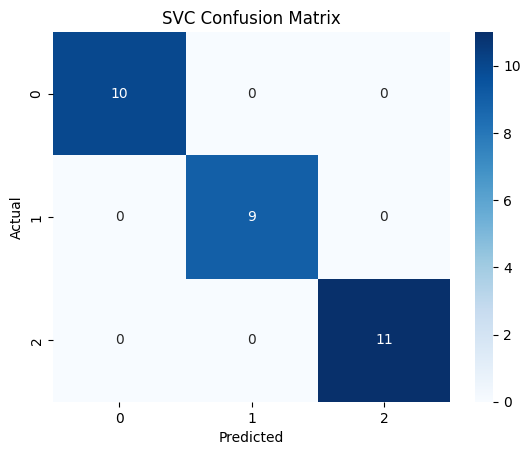

In [5]:
from src.model import plot_confusion_matrix
plot_confusion_matrix(y_pred, Y_test)
   

**Insight:**

- Matrix size: 3×3, because Iris has 3 classes.
- Y-axis = actual labels, X-axis = predicted labels.
- Diagonal values → correctly classified samples.
- Off-diagonal values → misclassifications (none in this case).
- Interpretation: model perfectly distinguishes Setosa, Versicolor, and Virginica.

### Step 6: Classification Report

In [6]:
from src.model import classification_rept
classification_rept(y_pred, Y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Insight:**

- Precision = 1.0 → all predicted labels for a class were correct (no false positives).
- Recall = 1.0 → all true samples of a class were identified (no false negatives).
- F1-score = 1.0 → perfect balance between precision and recall.
- Confirms that each class is classified perfectly.

### Step 7: ROC Curve & AUC

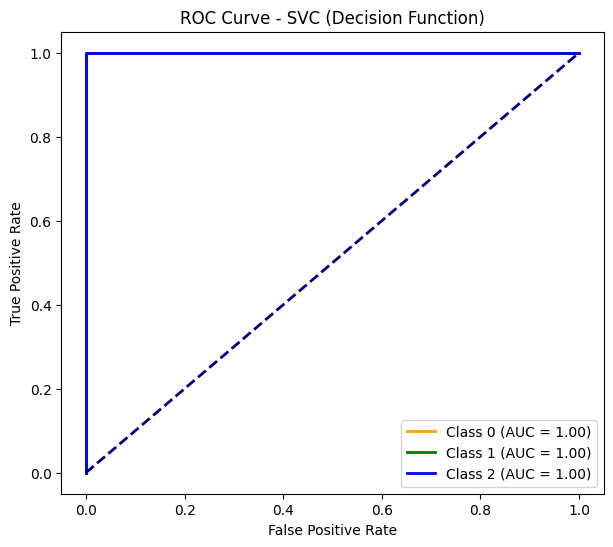

In [7]:
from src.model import roc_auc
roc_auc=roc_auc(Y_test, y_score)

**Insight:**  
- ROC curves show the trade-off between True Positive Rate and False Positive Rate for each class.  
- AUC values close to 1 indicate excellent discriminative ability, meaning the model perfectly separates all three Iris species.

### Step 8: Accuracy & AUC Table

In [8]:
from src.model import accu_auc_table
accu_auc_table(roc_auc, accu)

,Metrics,Score
0,Accuracy,100.0
1,AUC,1.0


**Insight:**  
- Accuracy is 100% and the macro-average AUC is 1.0, indicating the model perfectly classifies all Iris species with excellent discriminative ability.

### Step 9: Save model and Load model

In [10]:
from src.model import save_model
save_model(model, filename=r"D:\Thiru\ML_Projects\Iris-Species-Prediction\models\SVC.pkl")

from src.model import load_model
load_model(filename="D:\Thiru\ML_Projects\Iris-Species-Prediction\models\SVC.pkl")

model saved to D:\Thiru\ML_Projects\Iris-Species-Prediction\models\SVC.pkl
model loaded from D:\Thiru\ML_Projects\Iris-Species-Prediction\models\SVC.pkl


## Summary

- Final model: **SVC**
- Local Test Accuracy: ~ 100%
- Confusion Matrix: Correct vs incorrect predictions visualized
- Classification Report: Precision, Recall, F1-score per class
- ROC Curve: AUC ~ 1.0
- Model is ready for deployment, reporting, or further tuning